In [9]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import partial_dependence as pdp_plot

In [5]:
#read the data
df = pd.read_csv('winequality-red.csv')

#convert the target variable to a string
df['quality'] = df['quality'].astype(str)

#separate the target variable from the data
Y = df.pop('quality')
X = df

#separate the data into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

#create a model
rf = RandomForestClassifier()

#train the model
rf.fit(xtrain, ytrain)

/Users/rohanvartak/anaconda3/envs/fds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
#create a list of class labels
class_labels = list(rf.classes_)

#create a Partial Dependence object
pdp = pdp_plot.PartialDependence(xtest, rf, class_labels, class_labels[3]) 

In [31]:
#compute the curves of partial dependence for a variable
curves = pdp.pdp('volatile acidity')

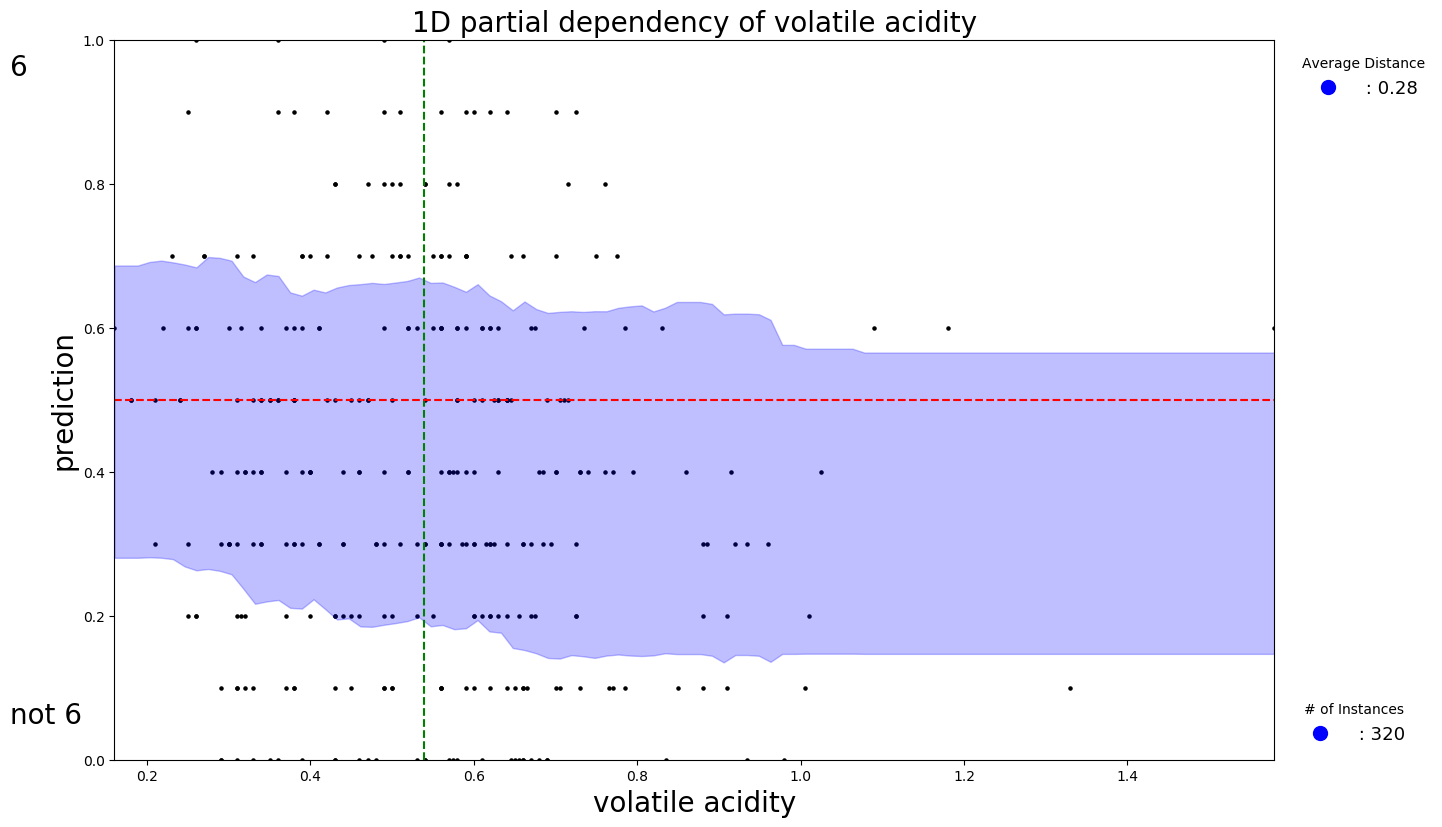

In [33]:
#plot the board curves for the variable
pdp.plot(curves, local_curves=False)

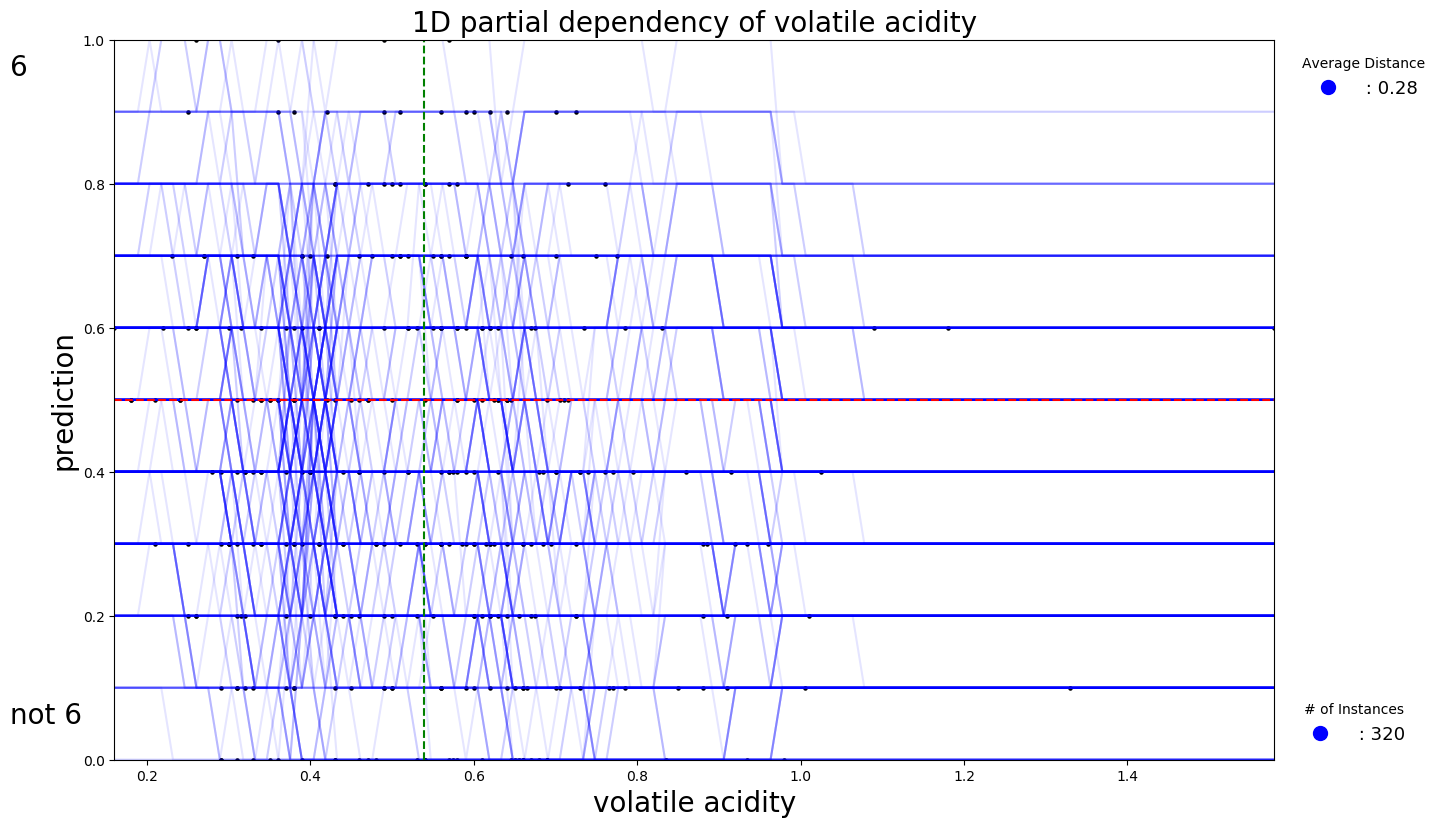

In [35]:
#individual curves can be plotted instead of plotting borad curves
pdp.plot(curves, plot_full_curves=True, local_curves=False)

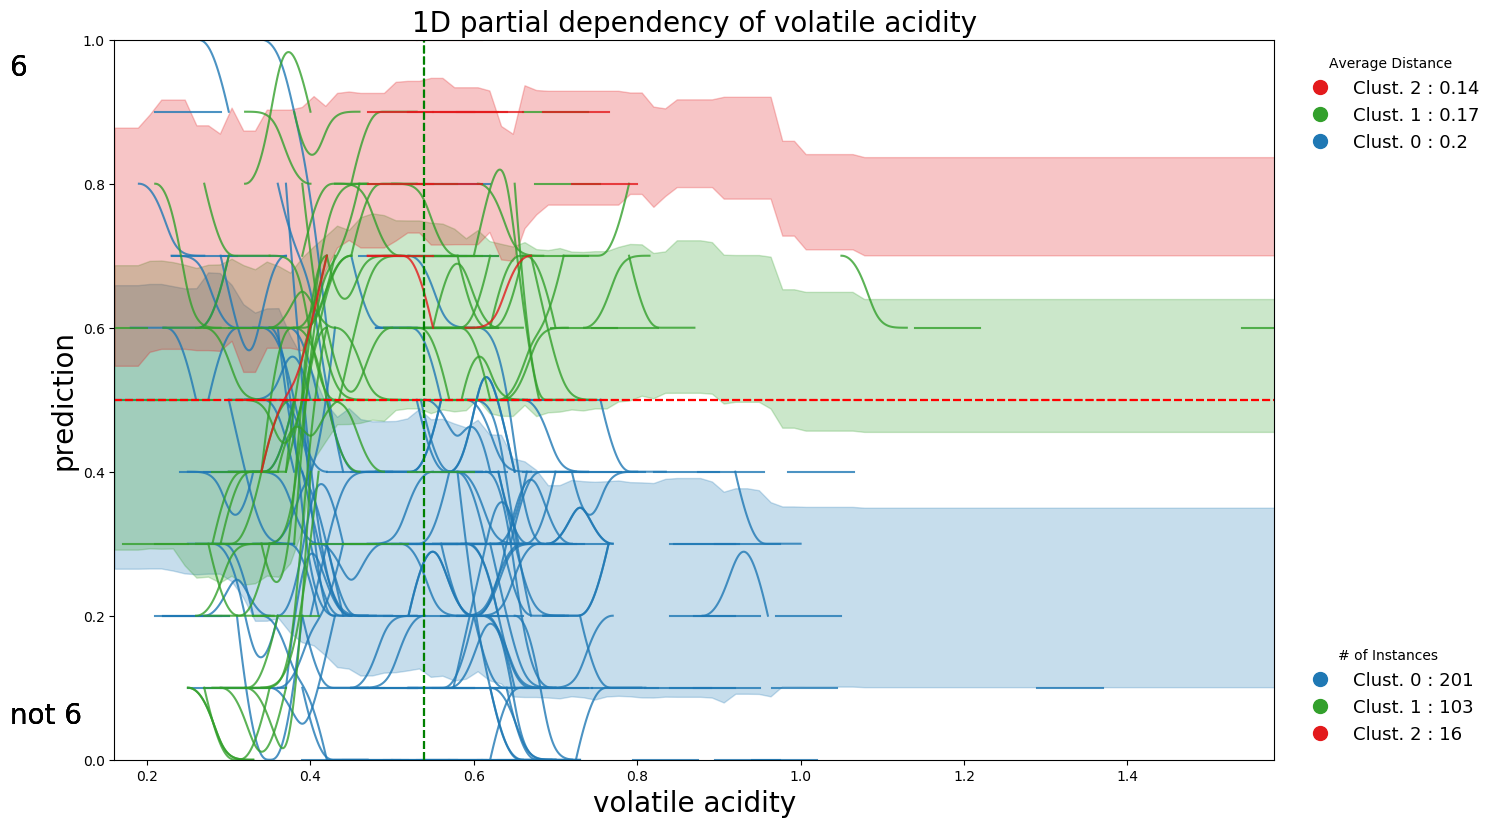

In [39]:
# the curves can also be grouped into clusters

#compute the clusters of curves for a specified number of clusters
clusters_list = pdp.compute_clusters(curves, 3)

#plot the clustered curves for the variable
pdp.plot(clusters_list)

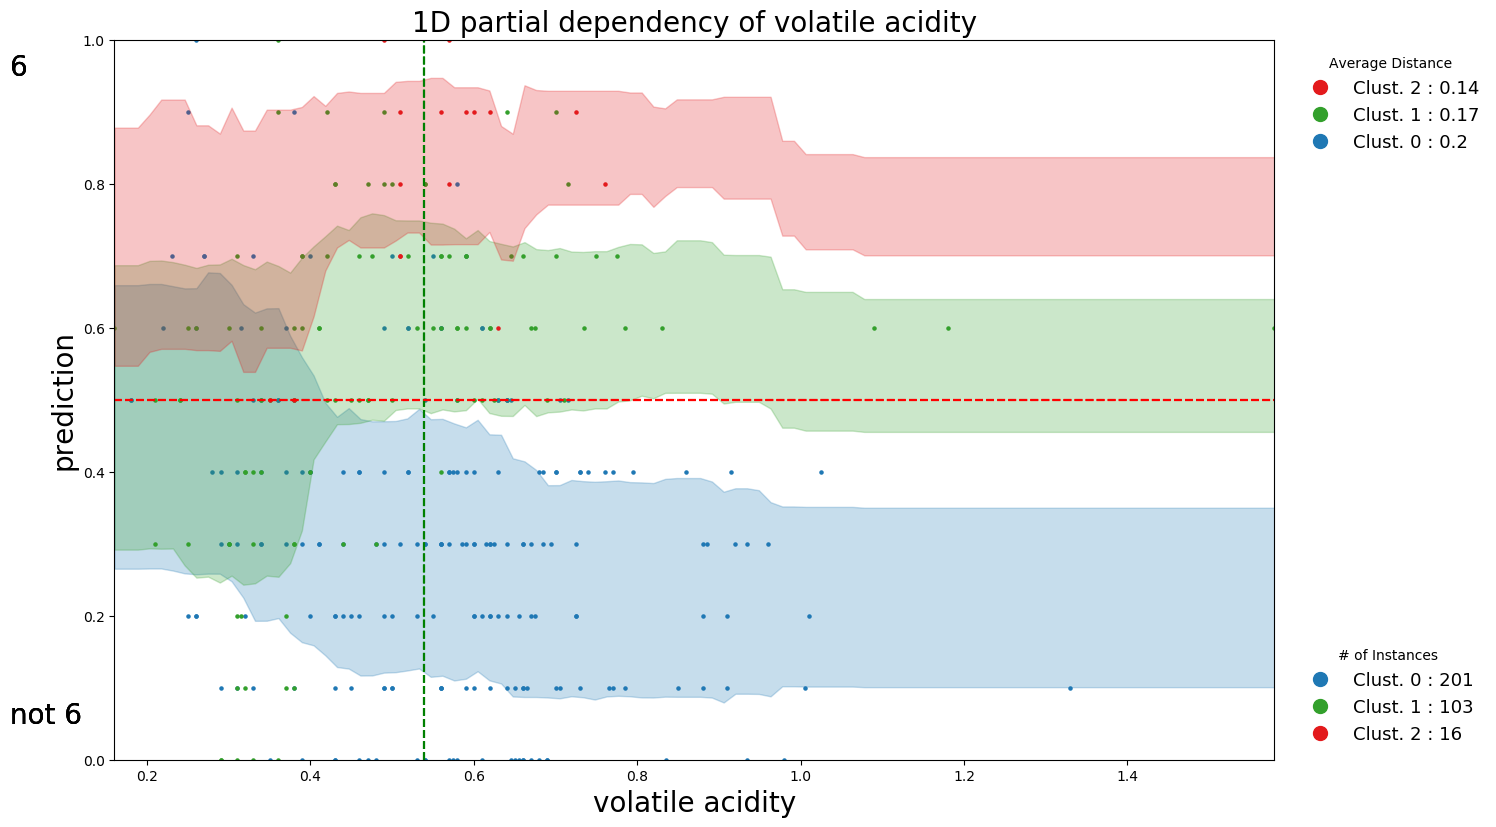

In [40]:
#local curves for the clusters can be hidden
pdp.plot(clusters_list, local_curves=False)

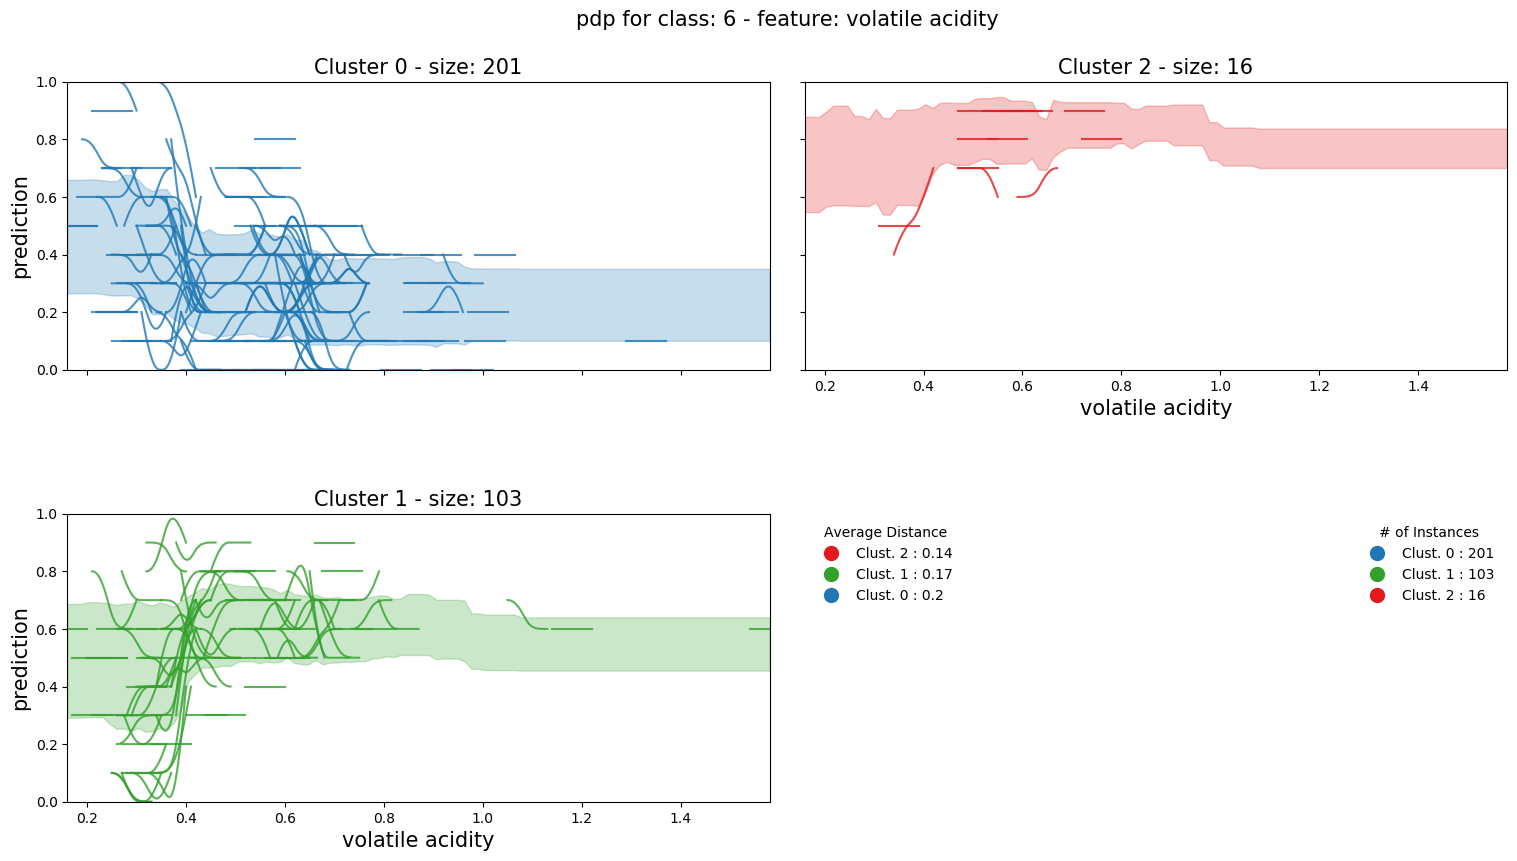

In [41]:
#each of the individual clusters can be seen in a different plot
pdp.plot(clusters_list, cell_view=True)

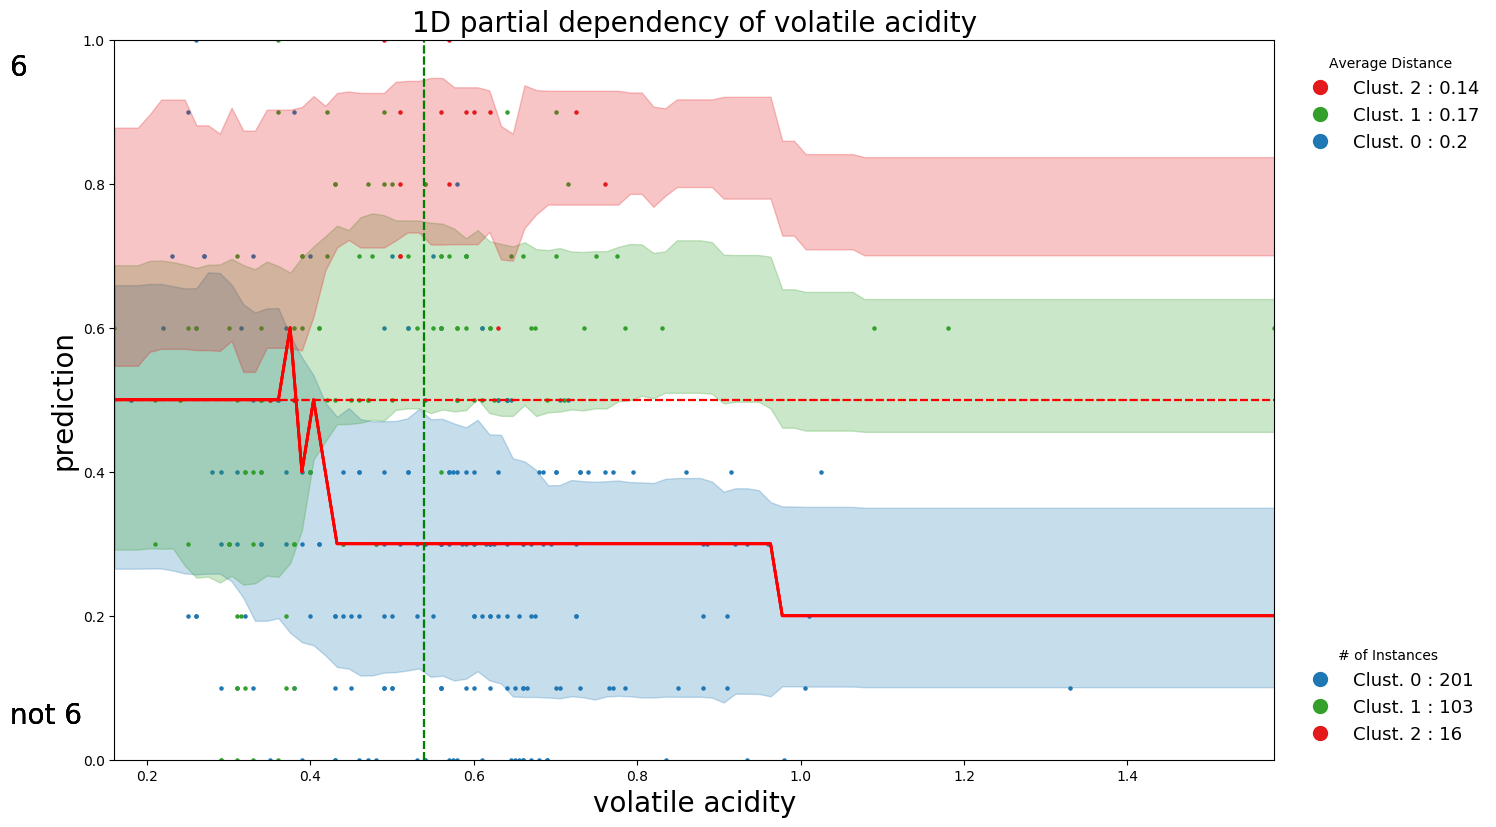

In [48]:
#It is also possible to highlight a particular vector from the data

#compute the curves and a custom prediction for the vector you want to highlight
curves, custom_pred = pdp.pdp('volatile acidity', chosen_row = xtest.iloc[31])

#compute the clusters
clusters_list = pdp.compute_clusters(curves, 3)

#plot the clustered curves along with the vector to highlight
pdp.plot(clusters_list, local_curves=False, chosen_row_preds_to_plot=custom_pred)
#the chosen vector will be highlighted in red